# 01.Analysis Seoul CCTV
## 1.데이터 읽기

In [2]:
### 데이터 분석을 위한 패키지 : Pandas
import pandas as pd

In [3]:
import socket

# 현재 머신의 호스트네임 확인
hostname = socket.gethostname()
print(hostname)

CCTV_Seoul=pd.DataFrame()
pop_Seoul=pd.DataFrame()
if "DESKTOP" in hostname:
    ### CSV 파일 읽기
    CCTV_Seoul = pd.read_csv("../../data/01.Seoul_CCTV/01. Seoul_CCTV.csv", encoding="UTF-8")
    pop_Seoul = pd.read_excel("../../data/01.Seoul_CCTV/01. Seoul_Population.xls",header=2,usecols="B,D,G,J,N")
else:
    CCTV_Seoul = pd.read_csv("/content/data/01. Seoul_CCTV.csv", encoding="UTF-8")
    pop_Seoul = pd.read_excel("/content/data/01. Seoul_Population.xls",header=2,usecols="B,D,G,J,N")
CCTV_Seoul.head()

fc152f91005f


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


미설치 시 설치 방법
 !conda install -y pandas

In [4]:
### CSV 파일 읽기
#CCTV_Seoul = pd.read_csv("../../data/01.Seoul_CCTV/01. Seoul_CCTV.csv", encoding="UTF-8")

In [5]:
CCTV_Seoul.head()
### 2행 만 읽기 CCTV_Seoul.head(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
### 끝에 줄만 읽기
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [7]:
### 컬럼 명의 변경
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [8]:
### 특정 컬럼 출력
CCTV_Seoul.columns[0]

'기관명'

In [9]:
### 컬럼명 변경하기
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별"},inplace=True)

In [10]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [11]:
### 엑셀 파일 읽기
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [12]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]:"구별"},inplace=True)
pop_Seoul.rename(columns={pop_Seoul.columns[1]:"인구수"},inplace=True)
pop_Seoul.rename(columns={pop_Seoul.columns[2]:"한국인"},inplace=True)
pop_Seoul.rename(columns={pop_Seoul.columns[3]:"외국인"},inplace=True)
pop_Seoul.rename(columns={pop_Seoul.columns[4]:"고령자"},inplace=True)

In [13]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

# 2.Pandas의 기초
- 파이썬에서 R만큼의 강력한 데이터 핸들링을제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩이 가능한 엑셀

In [14]:
import pandas as pd
import numpy as np

- pandas는 통상적으로 pd
- numpy는 통상적으로 np

# Series
- index 와 Value 로 이뤄짐
- 한 가지 데이터 형만 가질 수 있음

In [15]:
pd.Series([1,2,3,4])

,0
0,1
1,2
2,3
3,4


In [16]:
pd.Series([1,2,3,4] , dtype=np.float64)

,0
0,1.0
1,2.0
2,3.0
3,4.0


In [17]:
### object : String과 같음
pd.Series([1,2,3,4] , dtype=str)

,0
0,1
1,2
2,3
3,4


In [18]:
### numpy로 선언
pd.Series(np.array([1,2,3,4]))

,0
0,1
1,2
2,3
3,4


In [19]:
### 딕셔너리 선언
pd.Series({"Key":"Value"})

,0
Key,Value


In [20]:
### 숫자와 문자열을 동시에 선언가능 - 결과값 : object
data=pd.Series([1,2,3,4,"5"])
data

,0
0,1
1,2
2,3
3,4
4,5


In [21]:
### 짝수만 찾기
data=pd.Series([1,2,3,4])
data%2

,0
0,1
1,0
2,1
3,0


### 날짜데이터
- 날짜 : 문자열로 선언
- periods : 언제까지 할건지

In [22]:
pd.date_range("20250524",periods=6)

DatetimeIndex(['2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27',
               '2025-05-28', '2025-05-29'],
              dtype='datetime64[ns]', freq='D')

---

## DataFrame
- pd.DataFrame()
- index, value, column으로 이뤄짐

In [23]:
### 표준 정규분포에서 샘플링한 난수 생성
data=np.random.randn(6,4)
dates=pd.date_range("20250524",periods=6)

df=pd.DataFrame(data,index=dates,columns=["A","B","C","D"])

### 데이터 프레임 정보 탐색

#### df.head()
-  위쪽 데이터 출력

In [24]:
df.head()

,A,B,C,D
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075
2025-05-28,1.447070,2.584443,-0.088037,0.325649


#### df.tail()
-  아래쪽 데이터 출력

In [25]:
df.tail()

,A,B,C,D
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530


### df.index
- 인덱스 출력

In [26]:
df.index

DatetimeIndex(['2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27',
               '2025-05-28', '2025-05-29'],
              dtype='datetime64[ns]', freq='D')

### df.columns
- 컬럼 출력

In [27]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### df.values
- 값들 출력  

In [28]:
df.values

array([[-0.77688802,  1.69117569, -0.65793347, -0.0960617 ],
       [ 0.09235094, -0.94598048,  0.09644762,  0.36260005],
       [-0.38127482, -0.30958955, -1.88104628,  2.54208599],
       [-0.48947519, -1.76671181, -0.39319457,  0.65207464],
       [ 1.44707039,  2.58444323, -0.08803744,  0.32564854],
       [ 0.79445434,  1.96469585,  0.14042619,  0.19652957]])

### df.info()
- 데이터 프레임의 기본 정보 확인

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2025-05-24 to 2025-05-29
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


### df.describe()
- 데이터 프레임의 기술 통계 정보를 확인 가능

In [30]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.114373,0.536339,-0.463890,0.663813
std,0.853665,1.776823,0.757816,0.951724
min,-0.776888,-1.766712,-1.881046,-0.096062
25%,-0.462425,-0.786883,-0.591749,0.228809
50%,-0.144462,0.690793,-0.240616,0.344124
75%,0.618928,1.896316,0.050326,0.579706
max,1.447070,2.584443,0.140426,2.542086


### df.sort_values()
- 데이터 정렬
- 특정 컬럼을 기준으로 데이터를 정렬함

In [31]:
df

,A,B,C,D
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530


In [32]:
df.sort_values(by="B")

,A,B,C,D
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-28,1.447070,2.584443,-0.088037,0.325649


##### ascending=False
- 내림차순  하는 옵션

In [33]:
df.sort_values(by="B",ascending=False)

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075


##### inplace=True
  정렬 저장하기  

In [34]:
df.sort_values(by="B",ascending=False,inplace=True)

### 데이터 선택

#### df[<컬럼명>]
- 특정 컬럼 선택
- 시리즈 타입을 리턴함

In [35]:
df["A"]

,A
2025-05-28,1.447070
2025-05-29,0.794454
2025-05-24,-0.776888
2025-05-26,-0.381275
2025-05-25,0.092351
2025-05-27,-0.489475


- 컬럼명이 알파벳인 경우 대괄화 없이 가능

In [36]:
df.A

,A
2025-05-28,1.447070
2025-05-29,0.794454
2025-05-24,-0.776888
2025-05-26,-0.381275
2025-05-25,0.092351
2025-05-27,-0.489475


#### df[<컬럼1>,<컬럼2>]
  - 복수의 컬럼 선택

In [37]:
df[["A","B"]]

,A,B
2025-05-28,1.447070,2.584443
2025-05-29,0.794454,1.964696
2025-05-24,-0.776888,1.691176
2025-05-26,-0.381275,-0.309590
2025-05-25,0.092351,-0.945980
2025-05-27,-0.489475,-1.766712


#### df[n:m]
- n부터 m-1까지 슬라이싱

In [38]:
df[0:3]

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062


#### df[<컬럼명1>:<컬럼명2>]
- 컬럼명 1 부터 컬럼명 2까지 (포함)

In [39]:
df["2025-05-25":]

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075


#### loc
- 인덱스 이름으로 특정 행과 열을 선택

In [40]:
df.loc[:,["A","B"]]

,A,B
2025-05-28,1.447070,2.584443
2025-05-29,0.794454,1.964696
2025-05-24,-0.776888,1.691176
2025-05-26,-0.381275,-0.309590
2025-05-25,0.092351,-0.945980
2025-05-27,-0.489475,-1.766712


df.loc["2025-05-25":"2025-05-28",:]

In [41]:
df.loc["2025-05-25":,"A":"D"]

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075


### iloc
- 컴퓨터가 인식하는 인덱스 값으로 선택
- 0,1,2,3,4 등으로  선택함

In [42]:
df.iloc[3]

,2025-05-26
A,-0.381275
B,-0.309590
C,-1.881046
D,2.542086


In [43]:
df.iloc[3,2]

np.float64(-1.8810462823620364)

In [44]:
df.iloc[3:5,0:2]

,A,B
2025-05-26,-0.381275,-0.30959
2025-05-25,0.092351,-0.94598


##### 특정 컬럼만 선택하기

In [45]:
df.iloc[[1,2,4],[0.,2]]

,A,C
2025-05-29,0.794454,0.140426
2025-05-24,-0.776888,-0.657933
2025-05-25,0.092351,0.096448


In [46]:
df.iloc[:,1:3]

,B,C
2025-05-28,2.584443,-0.088037
2025-05-29,1.964696,0.140426
2025-05-24,1.691176,-0.657933
2025-05-26,-0.309590,-1.881046
2025-05-25,-0.945980,0.096448
2025-05-27,-1.766712,-0.393195


#### 조건 부여 (Condition)

-  0보다 큰 숫자만 선택
-  NaN : Not a Number : 숫자가 없음

In [47]:
df["A"]>0

,A
2025-05-28,True
2025-05-29,True
2025-05-24,False
2025-05-26,False
2025-05-25,True
2025-05-27,False


In [48]:
df[df["A"]>0]

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-25,0.092351,-0.945980,0.096448,0.362600


In [49]:
df[df>0]

,A,B,C,D
2025-05-28,1.447070,2.584443,NaN,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-24,NaN,1.691176,NaN,NaN
2025-05-26,NaN,NaN,NaN,2.542086
2025-05-25,0.092351,NaN,0.096448,0.362600
2025-05-27,NaN,NaN,NaN,0.652075


### 컬럼 추가
#### df["컬럼명"]=[<컬럼내용>]
- 기존 컬럼이 없을 시 추가
- 기존 컬럼이 있을 시 업데이트

In [50]:
df["E"]=["1","2","3","4","4","5"]
df

,A,B,C,D,E
2025-05-28,1.447070,2.584443,-0.088037,0.325649,1
2025-05-29,0.794454,1.964696,0.140426,0.196530,2
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062,3
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086,4
2025-05-25,0.092351,-0.945980,0.096448,0.362600,4
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075,5


#### isin()
- 특정 요소가 있는지 확인
- bool로 리턴함

In [51]:
df["E"].isin(["1","4"])

,E
2025-05-28,True
2025-05-29,False
2025-05-24,False
2025-05-26,True
2025-05-25,True
2025-05-27,False


- 실제로 존재하는 값만 출력하기

In [52]:
df[df["E"].isin(["1","4"])]

,A,B,C,D,E
2025-05-28,1.447070,2.584443,-0.088037,0.325649,1
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086,4
2025-05-25,0.092351,-0.945980,0.096448,0.362600,4


### 특정 컬럼 제거
- del
- drop

In [53]:
del df["E"]
df

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-24,-0.776888,1.691176,-0.657933,-0.096062
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075


#### drop
- axis 옵션을 통해서 어떤걸 삭제 할지 바꿈
- axis = 0 : 가로
- axis = 1 : 세로

In [54]:
df.drop(["D"] , axis=1)

,A,B,C
2025-05-28,1.447070,2.584443,-0.088037
2025-05-29,0.794454,1.964696,0.140426
2025-05-24,-0.776888,1.691176,-0.657933
2025-05-26,-0.381275,-0.309590,-1.881046
2025-05-25,0.092351,-0.945980,0.096448
2025-05-27,-0.489475,-1.766712,-0.393195


In [55]:
df.drop(["2025-05-24"] , axis=0)

,A,B,C,D
2025-05-28,1.447070,2.584443,-0.088037,0.325649
2025-05-29,0.794454,1.964696,0.140426,0.196530
2025-05-26,-0.381275,-0.309590,-1.881046,2.542086
2025-05-25,0.092351,-0.945980,0.096448,0.362600
2025-05-27,-0.489475,-1.766712,-0.393195,0.652075


a

In [56]:
df["A"].apply("sum")

np.float64(0.6862376483402992)

In [57]:
df[["A","D"]].apply("sum")

,0
A,0.686238
D,3.982877


In [58]:
df["A"].apply(np.cumsum)

,A
2025-05-28,[1.4470703907067237]
2025-05-29,[0.7944543358162021]
2025-05-24,[-0.7768880153705437]
2025-05-26,[-0.3812748170008762]
2025-05-25,[0.09235094313828014]
2025-05-27,[-0.48947518894948683]


#### 양수/음수 확인 함수 만들기

In [59]:
def plusMinus(num):
    return "plus" if num > 0 else "minus"

In [60]:
df["A"].apply(plusMinus)

,A
2025-05-28,plus
2025-05-29,plus
2025-05-24,minus
2025-05-26,minus
2025-05-25,plus
2025-05-27,minus


In [61]:
df["A"].apply(lambda num : "plus" if num>0 else "minus")

,A
2025-05-28,plus
2025-05-29,plus
2025-05-24,minus
2025-05-26,minus
2025-05-25,plus
2025-05-27,minus


# 3. CCTV 데이터 둘러보기
3-1) 데이터 특징 확인
- tail : 데이터 끝 쪽 볼 수 있음
  - 마지막 줄 인덱스 > 24
  - 총 데이터 25개

In [62]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [63]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


## 3-2) sort
- 특정 값을 자세하기 볼 수 있음
- 소계가 적은 순으로 보기

In [64]:
CCTV_Seoul.sort_values(by="소계",ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


- 내림차순으로 출력해서 많은 순으로 보기

In [65]:
CCTV_Seoul.sort_values(by="소계",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


## 3-3) 데이터의 추가
- 필요한 데이터는 새롭게 추가함
- 해당 컬럼이 없으면 추가 / 있으면 업데이트
    - 최근 증가율 : 최근 몇 년간 시리즈를 합함

In [66]:
CCTV_Seoul["최근증가율"]=(
    (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2014년"])/CCTV_Seoul["2013년도 이전"]*100
)
CCTV_Seoul.sort_values(by="최근증가율",ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


# 4. 인구현황 데이터 보기
- 필요 없는 데이터 삭제
- 합계 데이터는 필요 없으므로 삭제

In [67]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [68]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [69]:
pop_Seoul.drop([0],axis=0 , inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


- unique() : dedup함

In [70]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [71]:
len(pop_Seoul["구별"].unique())

25

- 외국인 비율 / 고령자 비율

In [72]:
pop_Seoul["외국인비율"]=pop_Seoul["외국인"]/pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"]=pop_Seoul["고령자"]/pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [73]:
pop_Seoul.sort_values(by="인구수",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [74]:
pop_Seoul.sort_values(by="외국인비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [75]:
pop_Seoul.sort_values(by="고령자비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


----

# 5. 두 데이터 합치기

## 1) Pandas 에서 데이터프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join

### pd.merge()
- left
- right
- key
- how

#### 데이터 프레임 생성 방법
- 딕셔너리 안의 리스트 생성 방버

In [76]:
left=pd.DataFrame({
    "key" : ["K0","K4","K2","K3"],
             "A" : ["A0","A1","A2","A3"],
             "B" :["B0","B1","B2","B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


- 리스트 안의 딕셔너리 형태

In [77]:
right=pd.DataFrame([
    {"key":"K0","C":"C0","D":"D0"},
    {"key":"K1","C":"C1","D":"D1"},
    {"key":"K2","C":"C2","D":"D2"},
    {"key":"K3","C":"C3","D":"D3"}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


### pd.merge()
- 두 데이터 프레임을 컬럼이나 인덱스를 기준으로 병합하는 방법
- 키(key) : 기준이 되는 컬럼
- 기준이 되는 키 값은 두 데이터 프레임에 포함되어 있어야함
- on : 키를 기준으로 함
- 병합되는 키가 없으면 데이터가 나오지 않음

In [78]:
pd.merge(left,right,on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


#### how 옵션
- 어떤 데이터프레임을 기준으로 병합되는지
- 다른 데이터프레임에 해당 키가 없으면 NaN

In [79]:
pd.merge(left,right,how="left",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [80]:
pd.merge(left,right,how="right",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


#### how=outer
- 일반적으로 how의 옵션은 inner (교집합)
- outer 옵션으로 하면 합집합으로 합쳐짐
- 각자의 데이터에 없어도 만들어짐
- 없는 데이터는 NaN

In [81]:
pd.merge(left,right,how="outer",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A1,B1,NaN,NaN


In [82]:
## CCTV 데이터와 인구수 데이터를 병합

In [83]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [84]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [85]:
data_result=pd.merge(CCTV_Seoul,pop_Seoul,on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [86]:
#### 연도별 데이터 컬럼 삭제

In [87]:
del data_result["2013년도 이전"]
del data_result["2014년"]
data_result.drop(["2015년","2016년"],axis=1,inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set .index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 변경

In [88]:
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관관계 계수 파악
- corr()
- 상관관계가 0.2이상인 데이터를 비교
- 숫자여야 비교 가능

In [89]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [90]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


- CCTV 비율이 어느정도인지 확인

In [91]:
data_result["CCTV비율"]=data_result["소계"]/data_result["인구수"]*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


- CCTV 비율이 높은 5개 구 보기

In [92]:
data_result.sort_values(by="CCTV비율",ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


----

# matplotlib 기초

## 한국어 설정

In [93]:
#!apt-get install fonts-nanum*
#!rm -rf ~/.cache/matplotlib/*

In [94]:
import matplotlib.pyplot as plt
from  matplotlib import rc

path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"


#rc("font",family=font_name)
rc("font", family='NanumBarunGothic')
%matplotlib inline
#get_ipython().run_line_magic("matplolib","inline")

## 그래프 선언
- 그래프 선언 : plt.plot(x데이터,y데이터)
- 그래프 사이즈 : plt.figure(figsize=x축,y축)
- 그래프 보기 : plt.show()

### matplotlib 그래프의 기본 형태
````
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.show()
````

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


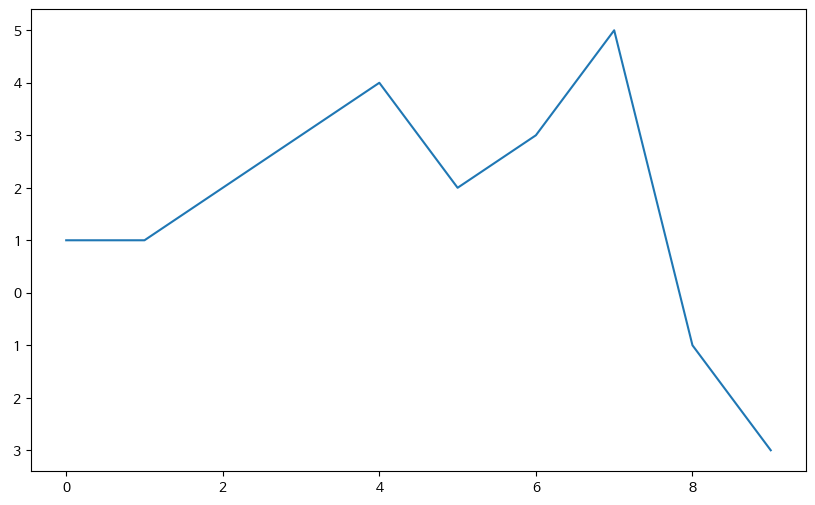

In [95]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9],[1,1,2,3,4,2,3,5,-1,-3])
plt.show()

### 그래프 커스터마이징

#### Numpy를 이용한 삼각함수 그리기
- np.arange(a,b,s) : a부터 b까지의 s의 간격
- np.sin(value)

In [96]:
import numpy as np
t=np.arange(0,12,0.01)
y = np.sin(t)

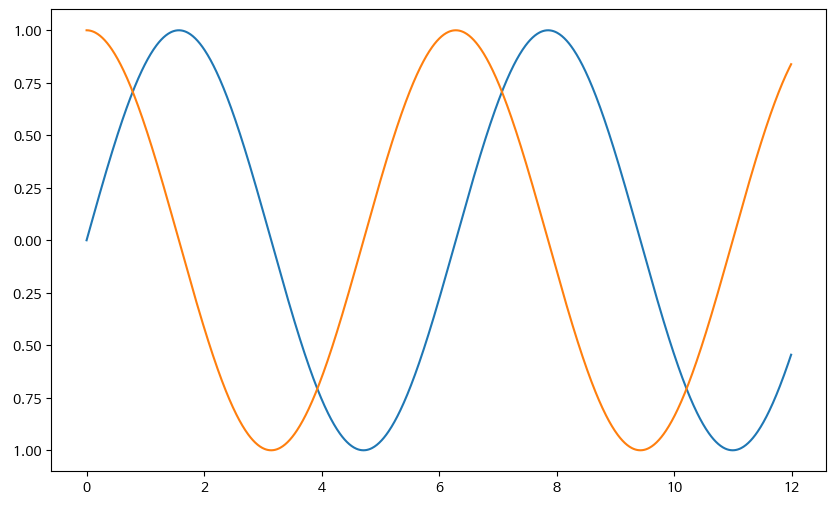

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.show()

1. 격자 무늬 추가
2. 그래프 제목
3. x축 y 축 제목추가
4. 범례 추가

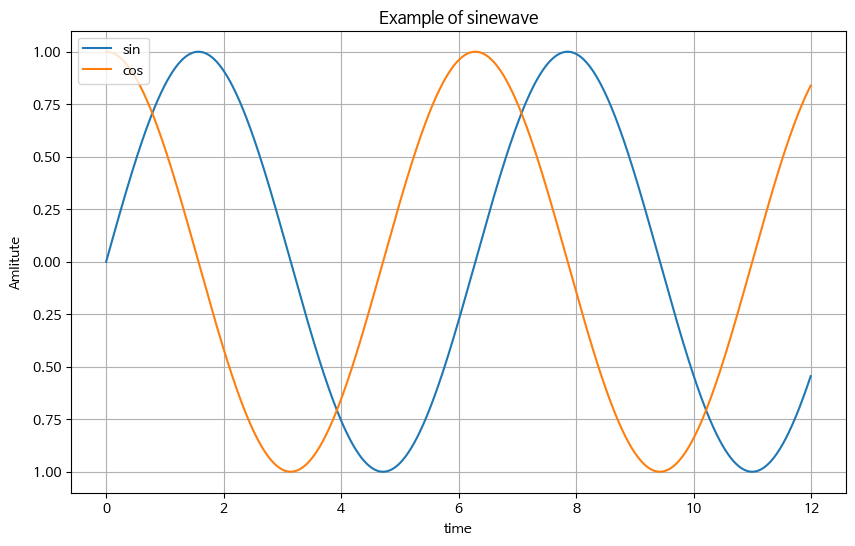

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t), label="sin")
plt.plot(t,np.cos(t), label="cos")

plt.grid(True)
plt.title("Example of sinewave")
plt.xlabel("time")
plt.ylabel("Amlitute")
#plt.legend(labels=["sin","cos"])
#plt.legend(loc="upper right")
plt.legend(loc=2)
plt.show()

In [99]:
def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(t,np.sin(t), label="sin")
    plt.plot(t,np.cos(t), label="cos")

    plt.grid(True)
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amlitute")
    #plt.legend(labels=["sin","cos"])
    #plt.legend(loc="upper right")
    plt.legend(loc=2)
    plt.show()

### 그래프 모양 커스텀
- `--` : 점표 표시

In [100]:
t=np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

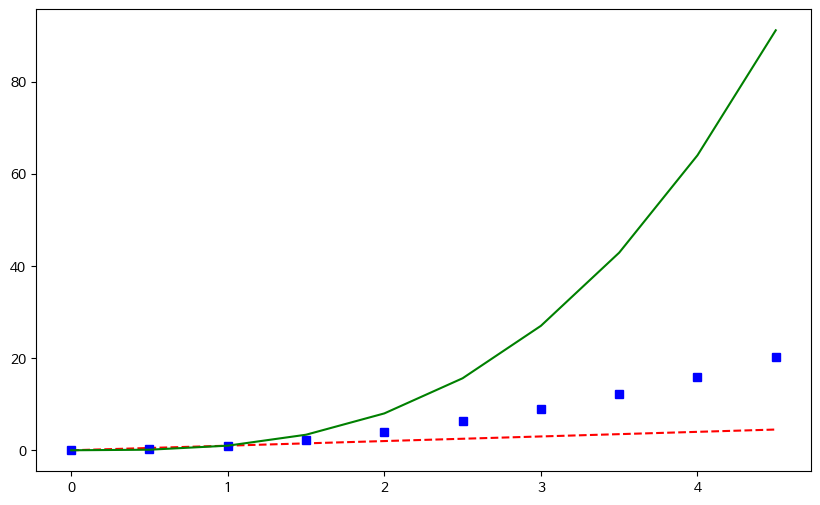

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t,t,"r--")
plt.plot(t,t **2, "bs")
plt.plot(t, t **3, "g")
plt.show()

In [102]:
t=list(range(0,7))
y=[1,4,5,8,9,5,3]

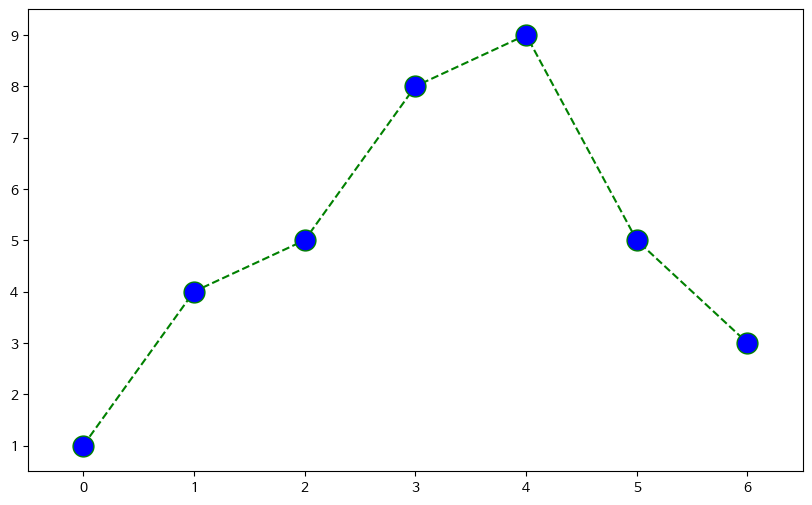

In [103]:
plt.figure(figsize=(10,6))
plt.plot(
    t,
    y,
    color="green", #"red" "blue"
    linestyle="dashed",
    marker="o",
    markerfacecolor="blue",
    markersize=15
)

plt.xlim([-0.5,6.5])
plt.ylim([0.5,9.5])
plt.show()

In [104]:
def drawGraph2():
    plt.figure(figsize=(10,6))
    plt.plot(
        t,
        y,
        color="green", #"red" "blue"
        linestyle="dashed",
        marker="o",
        markerfacecolor="blue",
        markersize=15
    )

    plt.xlim([-0.5,6.5])
    plt.ylim([0.5,9.5])
    plt.show()

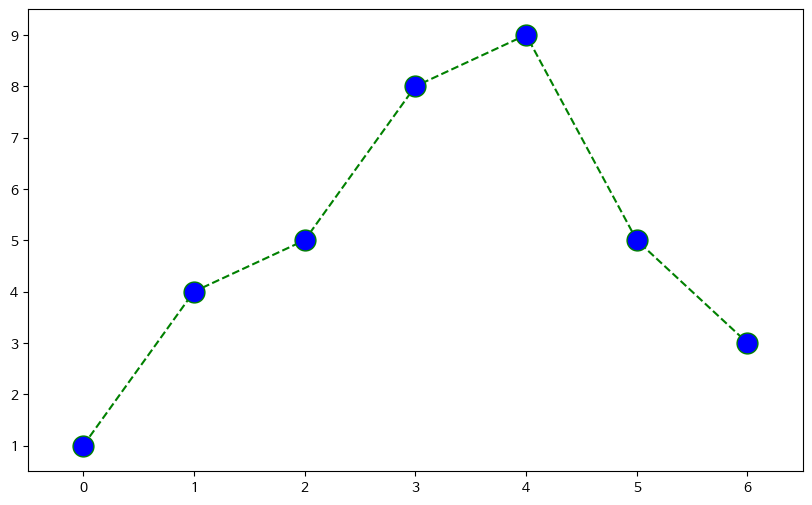

In [105]:
drawGraph2()

### scatter (점포도)

In [106]:
t = np.array(range(0,10))
y= np.array([9,8,7,9,8,3,2,4,3,4])

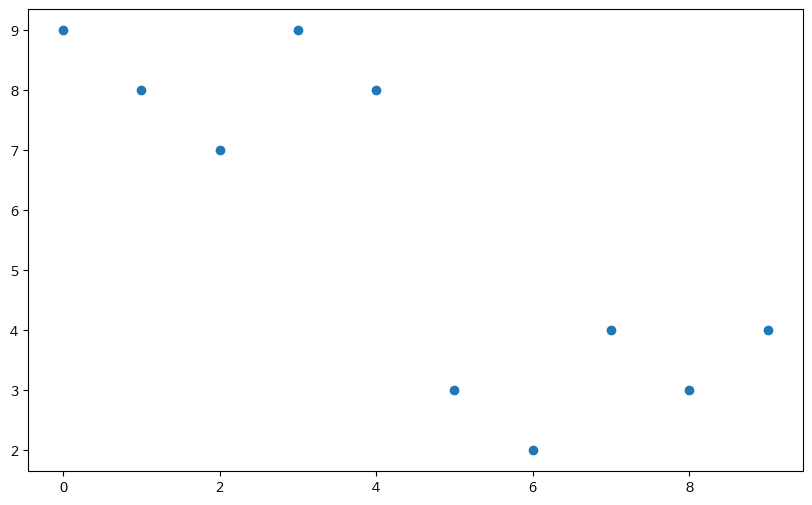

In [107]:
def drawGraph3():
    plt.figure(figsize=(10,6))
    plt.scatter(t,y)
    plt.show()

drawGraph3()

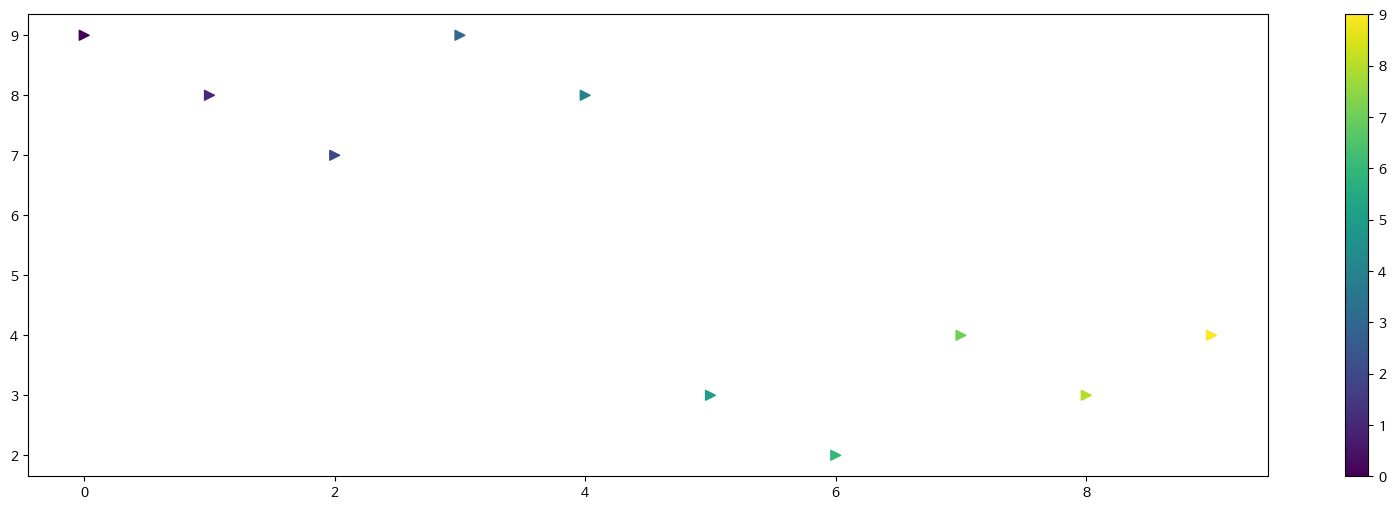

In [108]:
colormap=t
def drawGraph3():
    plt.figure(figsize=(20,6))
    plt.scatter(t,y,s=50,c=colormap,marker=">")
    plt.colorbar()
    plt.show()

drawGraph3()

### pandas에서도 plot 하기
- matplotlib을 가져와 사용함

In [109]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<Axes: xlabel='구별'>

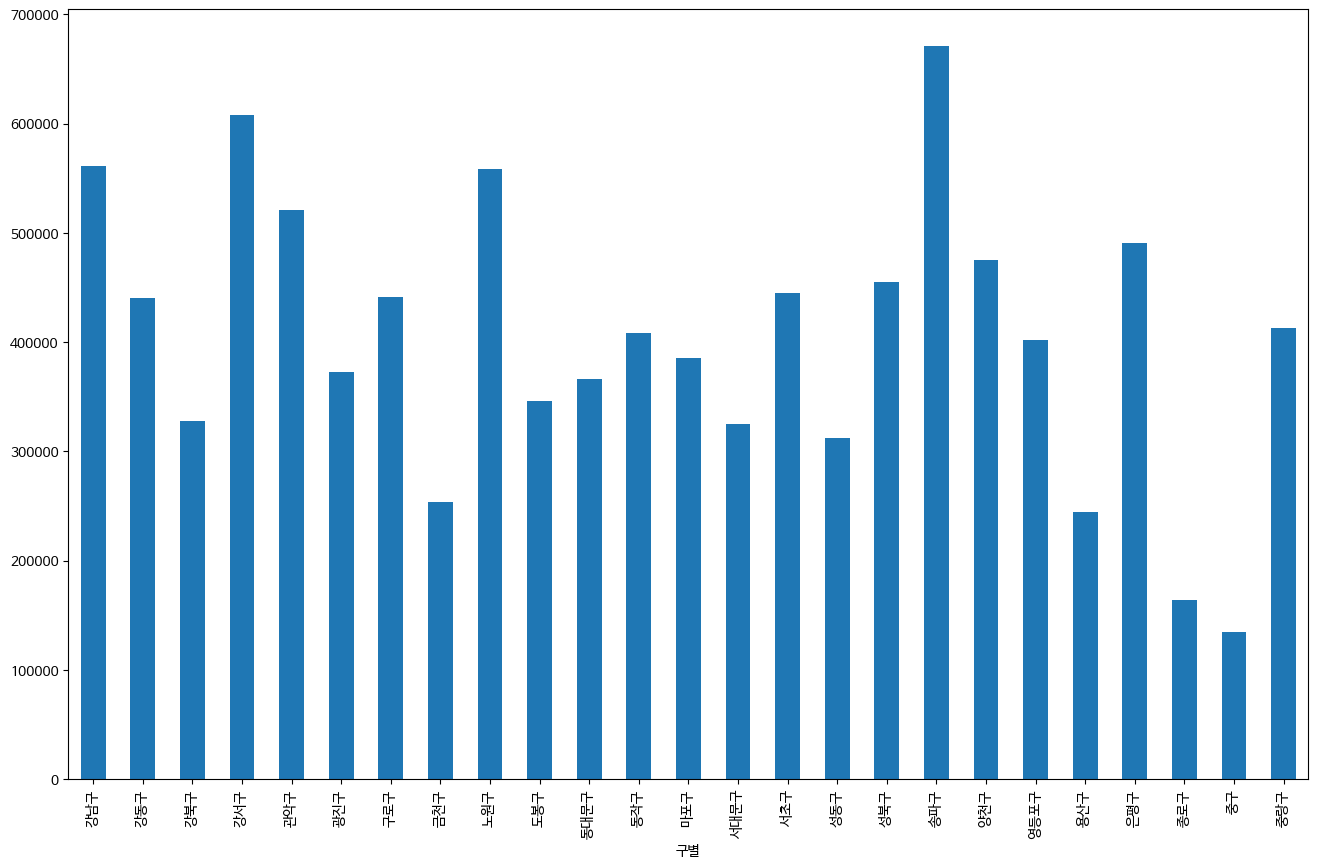

In [110]:
data_result["인구수"].plot(kind="bar",figsize=(16,10))

<Axes: ylabel='구별'>

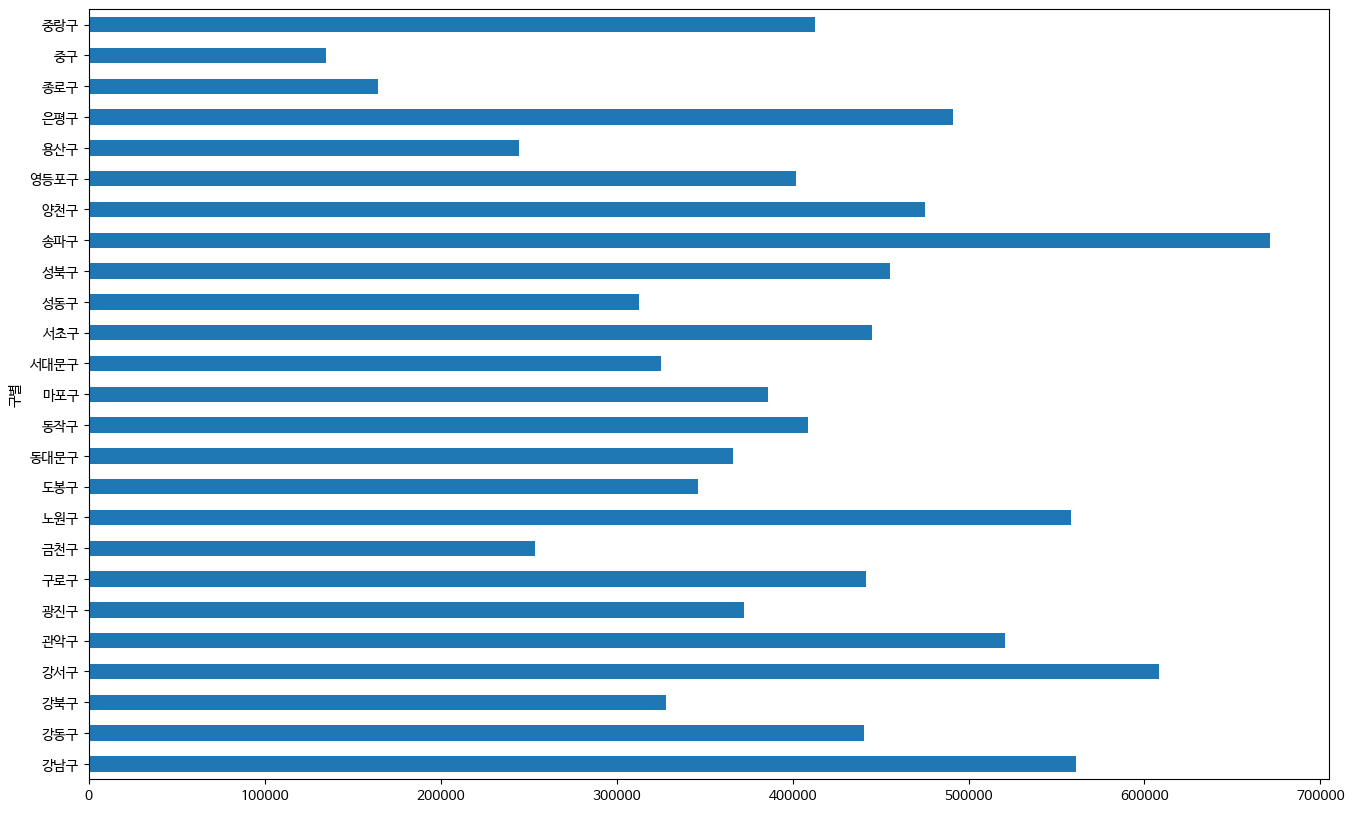

In [111]:
data_result["인구수"].plot(kind="barh",figsize=(16,10))


## CCTV 데이터 그래프 표현

#### 마이너스 부호 때문에  한글이 깨지는 것을 방지 하기 위한 설정
plt.rcParams["axes.unicode_minus"]=False

In [113]:
plt.rcParams["axes.unicode_minus"]=False

In [114]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


### 소계 컬럼의 시각화 - 막대그래프

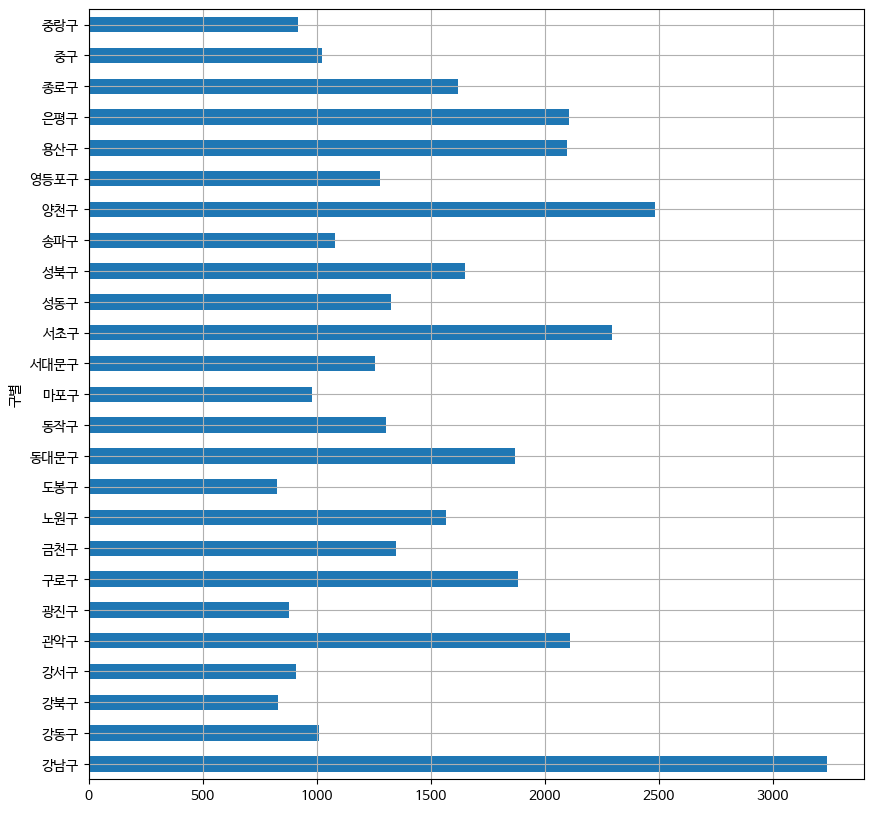

In [116]:
data_result["소계"].plot(kind="barh",grid=True,figsize=(10,10));

#### 데이터를 정렬 후 시각화

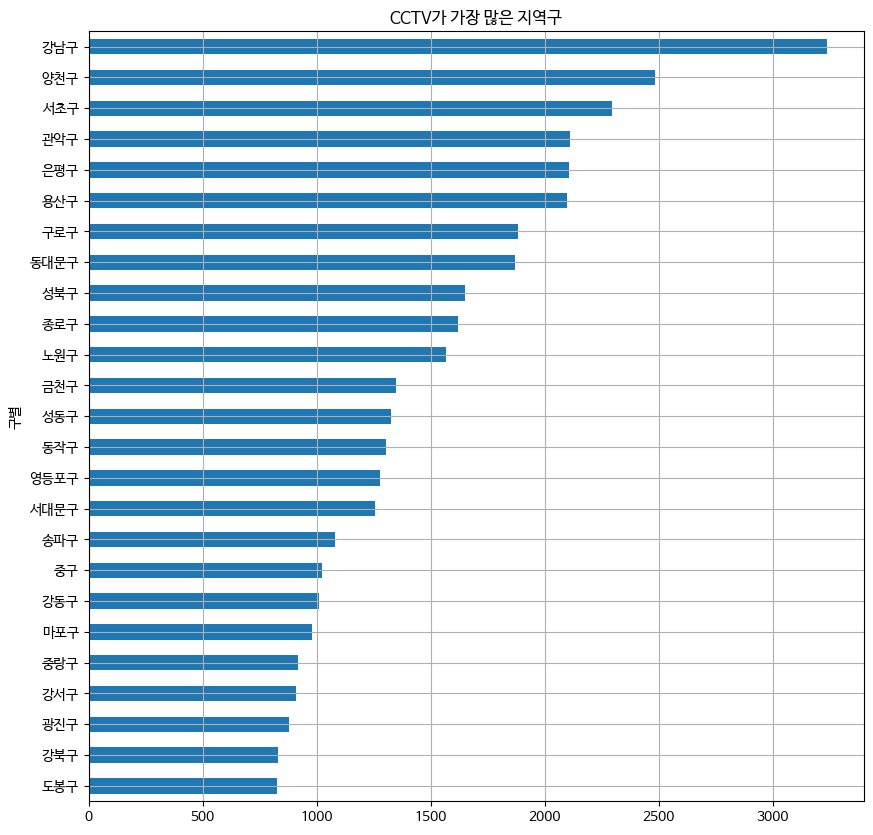

In [119]:
def drawGraph():
    data_result["소계"].sort_values().plot(kind="barh",grid=True,figsize=(10,10),title="CCTV가 가장 많은 지역구");
drawGraph()

#### CCTV 비율 시각화

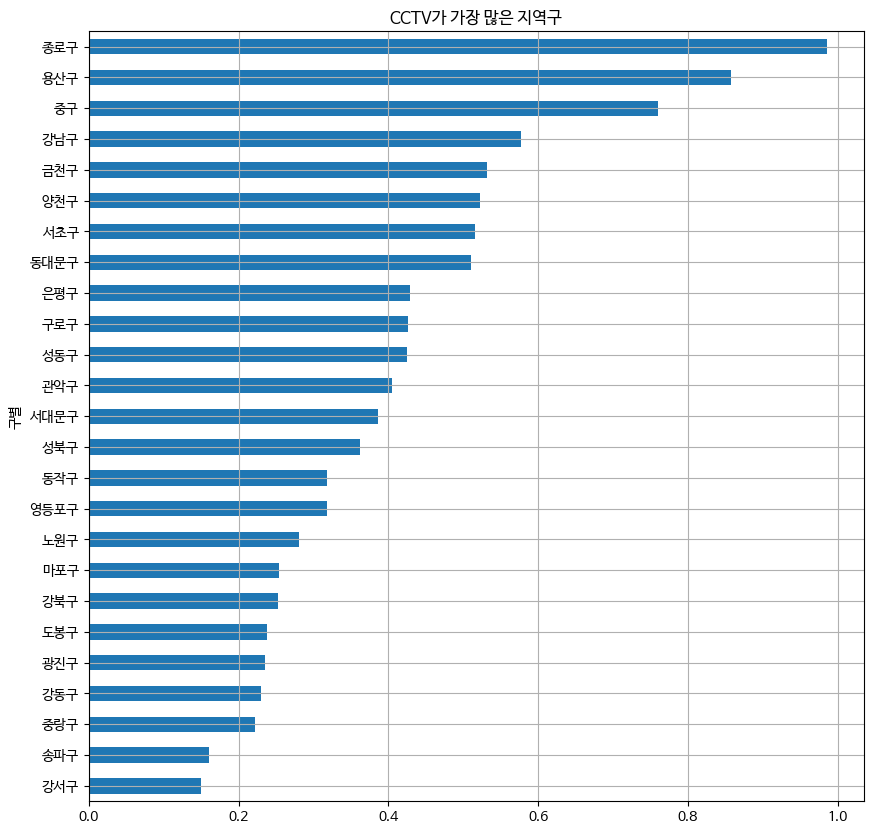

In [122]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(kind="barh",grid=True,figsize=(10,10),title="CCTV가 가장 많은 지역구");
drawGraph()

---

# 6.데이터의 경향성 파악하기

## 점포도 및 선형회귀
- 선형 회귀를 통해 데이터의 경향성을 보여줄 수 있음

- 인구수와 소계 컬럼으로 scatter plot 그리기

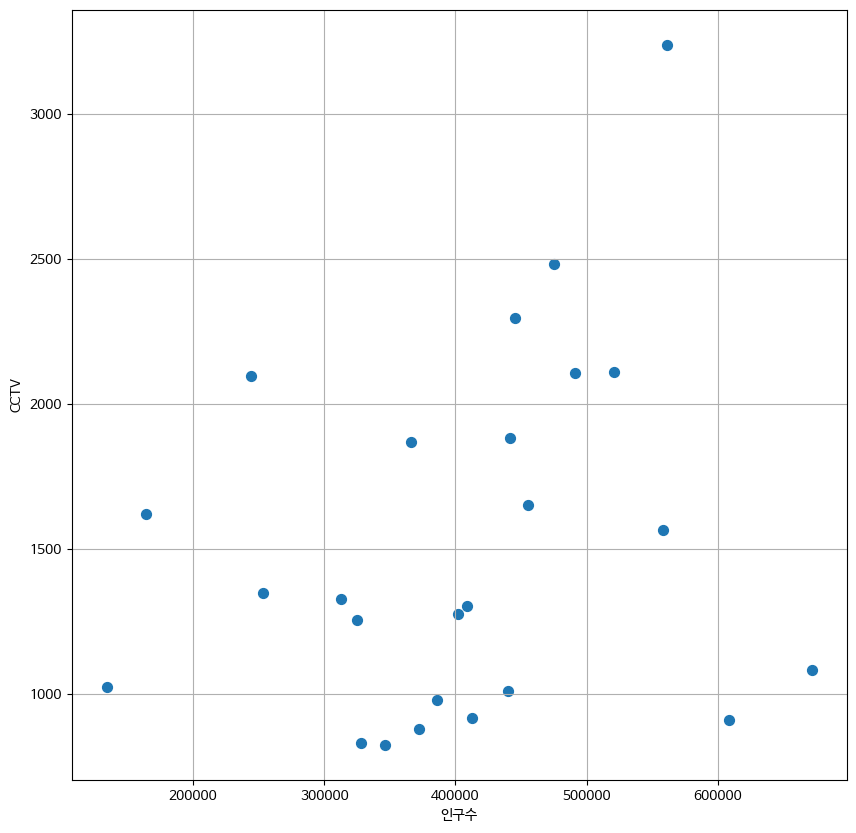

In [124]:
def drawGraph():
    plt.figure(figsize=(10,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()

## Numpuy를 이용한 선형회귀선 만들기
- np.polyfit() : 직선을 구성하기 위한 계산
- np.ploy1d() : polyfit으로 찾은 계소로 파이썬에서 사용 할 수 있는 함수로 만들어주는 기능

In [126]:
import numpy as np

- 선형회귀 직선 생성

In [127]:
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

array([1.11155868e-03, 1.06515745e+03])

- 파이썬으로 사용 할 수 있는 것으로 바꾸

In [128]:
f1=np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

- 인구 40만명인 구에서 서울시 전체 경향에 맞는 CCTV 수

In [131]:
print(round(f1(400000),1),"대")

1509.8 대


- 경향선을 그리기 위한 x 데이터 생성
- np.linespace(a,b,n) : a부터 b까지의 n개의 등간격 데이터 생성

In [133]:
fx=np.linspace(100000,700000,100)

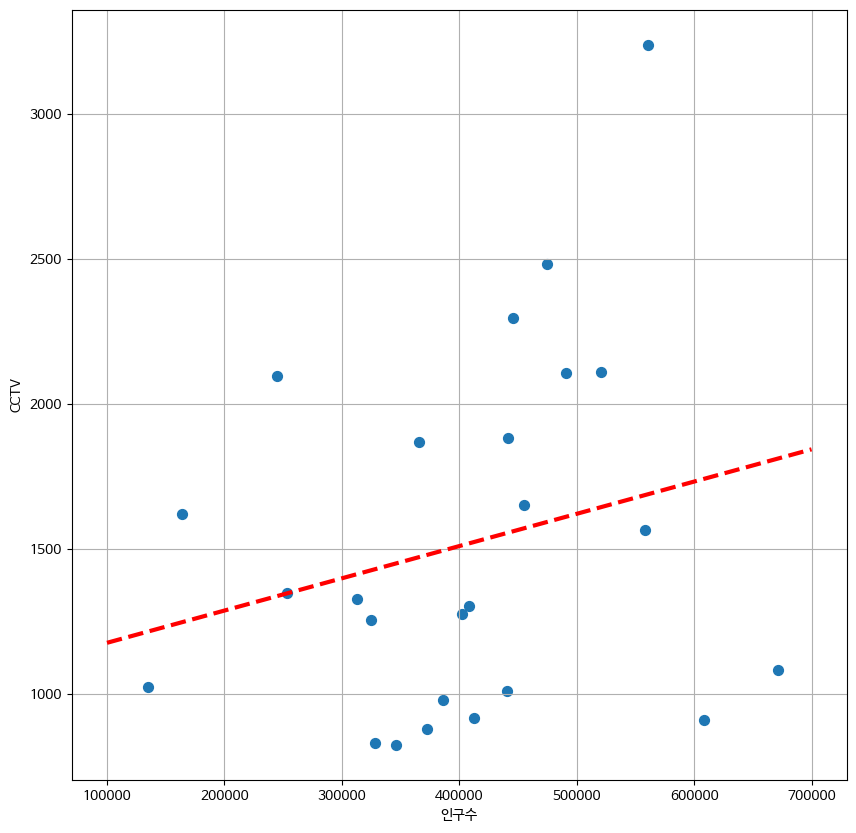

In [135]:
def drawGraph():
    plt.figure(figsize=(10,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    ### 선형 회귀 추가
    plt.plot(fx,f1(fx),ls="dashed",lw=3,color="r")
    plt.show()
drawGraph()

# 7. 강조하고 싶은 데이터 시각화
- 경향과의 오차 추가
- 경향은 f1함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [137]:
### 오차 컬럼
data_result["오차"] = data_result["소계"]-f1(data_result["인구수"])
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


- 경향과 비교하여 데이터 오차가 많이 나는 데이터 계산

In [138]:
df_sort_f = data_result.sort_values(by="오차",ascending=False)
df_sort_t = data_result.sort_values(by="오차",ascending=True)

In [139]:
### CCTV가 많은 지역구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [140]:
### CCTV가 적은 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


### 경향에 따른 색깔 구분 및 이름 추가

In [142]:
### 컬러맵을 추가 하기 위한 서브 패키지 추가
from matplotlib.colors import ListedColormap

### colormap 사용자 정의
color_step=("#e74c3c","#2ecc71","#95a9a6","#2ecc71","#3498db","#3489db")
bmy_cmap=ListedColormap(color_step)

- 점포도에 색상 추가
  - 색상 추가 기준 : c
  - 색상 컬러맵 : cmap
- 컬러바 추가 : plt.colorbar()
- 특정 점에 텍스트 찍기
  - plt.text(x축,y축,텍스트,fontsize=폰트크기)
    - x축과 y축에 `*1.02`등을 곱하여 간격을 조정 할 수 있음

<ipython-input-151-b3ce57d52d16>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort_f["인구수"][i] *1.02,
<ipython-input-151-b3ce57d52d16>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort_f["소계"][i]*0.98,
<ipython-input-151-b3ce57d52d16>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort_t["인구수"][i] *1.02,
<ipython-input-151-b3ce57d52d16>:18: FutureWarning: Series.__getitem__ treating keys as positions is depreca

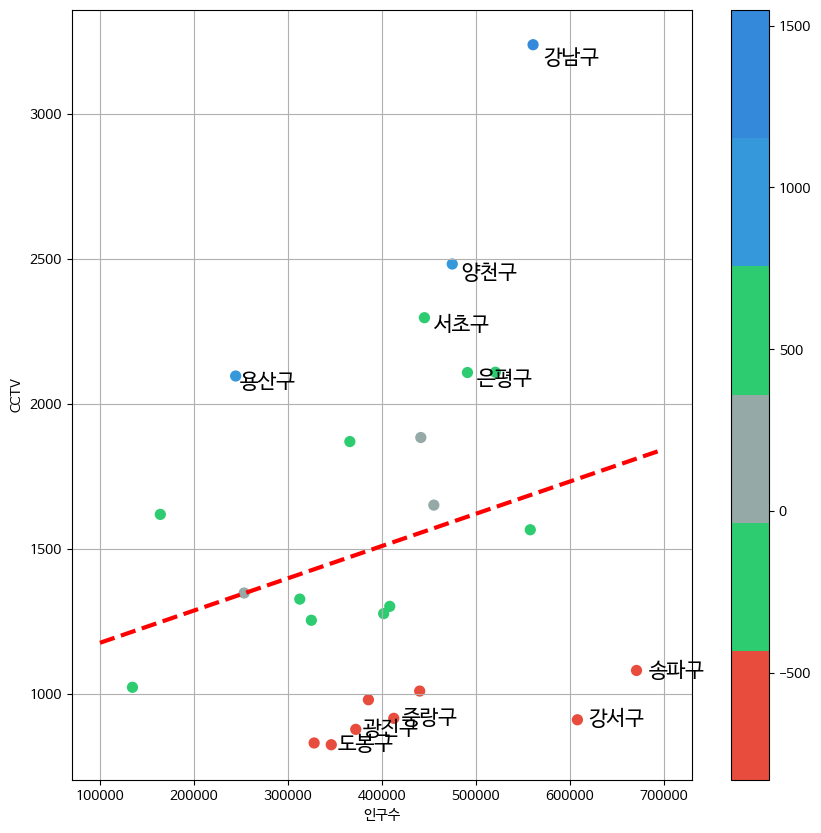

In [151]:
def drawGraph():
    plt.figure(figsize=(10,10))
    ### c=색상 기준 데이터 cmap = 컬러맵
    plt.scatter(data_result["인구수"],data_result["소계"],s=50,c=data_result["오차"],cmap=my_cmap)
    ### 컬러바 추가
    plt.colorbar()
    ### 오차 계산 하기
    for i in range(5):
        plt.text(
            df_sort_f["인구수"][i] *1.02,
            df_sort_f["소계"][i]*0.98,
            df_sort_f.index[i],
            fontsize=15
            )
    for i in range(5):
        plt.text(
            df_sort_t["인구수"][i] *1.02,
            df_sort_t["소계"][i]*0.98,
            df_sort_t.index[i],
            fontsize=15
            )


    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    ### 선형 회귀 추가
    plt.plot(fx,f1(fx),ls="dashed",lw=3,color="r")
    plt.show()
drawGraph()

데이터 저장하기

In [153]:
if "DESKTOP" in hostname:
    data_result.to_csv("../../data/01.result.csv",sep=",",encoding="UTF-8")
else:
    data_result.to_csv("/content/data/01.result.csv",sep=",",encoding="UTF-8")